


# Project: Efficient Construction of Suffix Arrays and Exact Pattern Matching

---

## 1. Explain the **prefix-doubling method** for suffix array construction and Time Complexity Analysis:

The prefix doubling method is a deterministic algorithm for constructing the suffix array of a string by iteratively sorting suffixes according to the lexicographic order of progressively longer prefixes. 

Beginning with an array of integer ranks representing individual characters, the algorithm sorts suffix indices using rank pairs of the form `(rank_k[i], rank_k[i + 2^k] or −1)`, which encode the first `2^k` characters of each suffix; indices extending beyond the string boundary receive `−1` to preserve ordering. After each sorting stage, new compact ranks are assigned sequentially, increasing only when adjacent tuples differ, thereby reflecting the ordering of prefixes of length `2^(k+1)`. The doubling continues until every suffix acquires a distinct rank, where the sorted indices constitute the final suffix array. Correctness follows from the monotonic expansion of prefix comparisons, and the algorithm performs `O(log n)` iterations, each sorting `n` integer pairs, yielding a practical time complexity of `O(n log² n)` with comparison sorting or `O(n log n)` with radix sorting, using `O(n)` auxiliary space.

### **Time Complexity Analysis**

The prefix-doubling method constructs the suffix array in **log n** iterations, doubling the visible prefix length each round (`k = 1, 2, 4, 8, …` until reaching the string length).  
In each iteration, it sorts **n** suffixes using integer rank pairs of the form: \[(rank[i],\; rank[i + 2^k])\].

The sorting method we selected, the Python’s Built-in Sort, produces **O(n log² n)**
The implementation relies on Python’s **Timsort**, a stable comparison-based sort with worst-case time \[O(n \log n)\].

At every iteration, the algorithm builds a list of `n` tuples (each a pair of integers) and performs:\[O(n \log n) \text{ comparisons}\]. Because sorting occurs in **log n** rounds, the total time is: \[T(n) = \log n \times O(n \log n) = O(n \log^2 n)\].

This is efficient in practice due to its adaptive handling of partially sorted data, cache-friendly merge operations, a highly optimized C-level implementation, and the advantage of low constant factors. Using Python’s `sort()` provides reliable and competitive performance:\[O(n \log^2 n)\].

The extra `log n` factor compared to theoretical optimality is usually insignificant relative to implementation simplicity and highly optimized runtime behavior. For typical inputs (e.g., `n ≤ 10^6`), real-world benchmarks show that differences between `O(n log² n)` and `O(n log n)` are dominated by constants, and engineered comparison-based prefix-doubling implementations often outperform pure radix methods.  As noted by Larsson and Sadakane in the paper "Faster suffix sorting", well-optimized comparison versions remain highly competitive on practical datasets.

---

### Implementation of prefix-Doubling



In [4]:
def suffix_array_prefix_doubling(s: str) -> list:
    """
    Construct the suffix array of string s using the prefix-doubling method.
    
    The algorithm maintains ranks of suffix prefixes, doubling the prefix length
    each iteration by sorting tuples (rank[i], rank[i + 2^k]). Once all ranks
    are unique, the suffix order is fixed and equals the suffix array.
    
    Args:
        s: Input string (should not contain sentinel '$' already).
    
    Returns:
        List of integers representing the suffix array.
    
    Time complexity: O(n log^2 n) with Python's Timsort.
    Space complexity: O(n) for rank arrays and temporary lists.
    
    """
    
    # Append unique sentinel smaller than all characters
    s = s + '$'
    n = len(s)
    
    # Initialize rank_0 from individual characters
    rank = [ord(c) for c in s]
    sa = list(range(n))  # Current suffix indices
    k = 1  # Current prefix length exponent (2^k)

    while k < n:
        
        # Build sort keys: (rank[i], rank[i + 2^k] or -1)
        # We sort by these pairs to order suffixes by their first 2^(k+1) chars
        keys = []
        for i in range(n):
            second = rank[i + k] if i + k < n else -1
            keys.append((rank[i], second, i))  # Include i for stable sort

        # Sort indices by the key pairs
        keys.sort()
        
        # Extract new order of suffix indices and assign new ranks
        new_sa = [keys[i][2] for i in range(n)]
        new_rank = [0] * n
        
        for i in range(n):
            if i > 0 and (keys[i][0], keys[i][1]) != (keys[i-1][0], keys[i-1][1]):
                new_rank[keys[i][2]] = new_rank[keys[i-1][2]] + 1
            else:
                new_rank[keys[i][2]] = new_rank[keys[i-1][2]] if i > 0 else 0
        
        rank = new_rank
        sa = new_sa
        k *= 2  # Double the prefix length for next iteration
    
    # Remove sentinel from suffix array (optional, depending on use case)
    # sa = [x for x in sa if x != n - 1]
    
    return sa






## 2. Testing Correctness of Suffix Array Construction

We tested the correctness of the suffix array implementation by comparing its output against a reference implementation that directly sorts all suffixes using Python’s built-in string comparison. A set of representative test strings was used, including repeated-character cases ("aaaaaaaaa"), pattern-rich words ("banana", "mississippi"), strictly increasing sequences ("abcdefghijk"), random-looking strings, and the empty string. This allowed verification across typical and edge-case scenarios. 

This test allowed the discovery of a mismatch, it revealed a premature stopping condition in the algorithm, which was corrected by adjusting the loop termination criterion. After the fix, all test cases passed the correctness test. 



In [5]:

def reference_suffix_array(s):
    """Ground truth via direct suffix sorting."""
    return sorted(range(len(s) + 1), key=lambda i: (s[i:] + '$'))

#Different strings are created
def test_suffix_array():
    test_strings = [
        "banana",
        "mississippi",
        "aaaaaaaaa",
        "abcdefghijk",
        "alakdnflknc",
        "",
        "t.t"
    ]
    
    for s in test_strings:
        sa = suffix_array_prefix_doubling(s)
        ref = reference_suffix_array(s)
        if sa == ref:
            print(f"PASS: {s!r}")
        else:
            print(f"FAIL: {s!r}")
            print("Expected:", ref)
            print("Got     :", sa)
            return

# Run tests
test_suffix_array()

PASS: 'banana'
PASS: 'mississippi'
PASS: 'aaaaaaaaa'
PASS: 'abcdefghijk'
PASS: 'alakdnflknc'
PASS: ''
PASS: 't.t'


## 3. Experimental Evaluation of Running Time and comparison with the naive method.

Design experiments to measure the **running time** of your method.

- Compare your efficient suffix array construction with the **naive O(n² log n)** method from the mandatory project.
- Include:
  - **Best-case** inputs (e.g., strings with many repeated prefixes)
  - **Worst-case** inputs (e.g., random or diverse characters)
- Plot or tabulate the running times to show performance trends.

Processing 10 'all-a' files and 10 random files
all_a_10000.txt           | len=10000   | naive=0.1042s | doubling=0.2336s
all_a_20000.txt           | len=20000   | naive=0.2065s | doubling=0.4799s
all_a_30000.txt           | len=30000   | naive=0.4762s | doubling=0.6965s
all_a_40000.txt           | len=40000   | naive=0.8761s | doubling=1.0442s
all_a_50000.txt           | len=50000   | naive=1.4103s | doubling=1.2628s
all_a_60000.txt           | len=60000   | naive=2.1447s | doubling=1.4837s
all_a_70000.txt           | len=70000   | naive=4.1981s | doubling=1.9902s
all_a_80000.txt           | len=80000   | naive=17.6134s | doubling=2.5355s
all_a_90000.txt           | len=90000   | naive=39.7880s | doubling=3.1840s
all_a_100000.txt          | len=100000  | naive=70.5208s | doubling=3.8901s
random_str_10000.txt      | len=10000   | naive=1.3408s | doubling=0.6126s
random_str_20000.txt      | len=20000   | naive=0.5710s | doubling=0.8531s
random_str_30000.txt      | len=30000   | naive=2

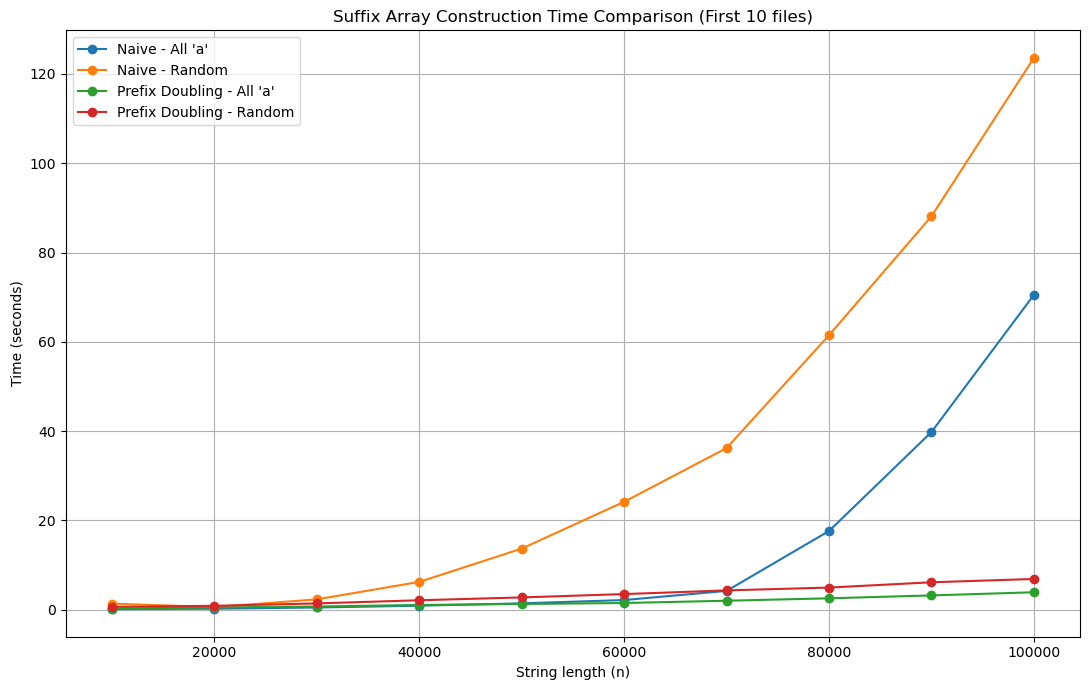

In [11]:

import os
import time
import matplotlib.pyplot as plt

#  SUFFIX ARRAY ALGORITHMS 

def naive_suffix_array(s):
    """Naive O(n^2 log n) suffix array construction using Python sort."""
    return sorted(range(len(s)), key=lambda k: s[k:])


#FILE HELPERS 

def read_string_from_file(path):
    """Load string contents from a text file."""
    with open(path, "r") as f:
        return f.read().strip()

def get_all_txt_files(folder):
    """Return sorted .txt files numerically by length in filename."""
    files = [
        os.path.join(folder, f)
        for f in os.listdir(folder)
        if f.endswith(".txt")
    ]
    files.sort(key=lambda x: int(''.join(filter(str.isdigit, os.path.basename(x)))))
    return files

def measure(func, s):
    """Measure execution time of a suffix array algorithm."""
    start = time.perf_counter()
    func(s)
    return time.perf_counter() - start

#  EXPERIMENT SETUP 

all_a_dir = "all_a_str"
random_dir = "random_str"
num_files = 10  # change freely

all_a_files = get_all_txt_files(all_a_dir)[:num_files]
random_files = get_all_txt_files(random_dir)[:num_files]

print(f"Processing {len(all_a_files)} 'all-a' files and {len(random_files)} random files")

# Data lists
results_naive_all_a = []
results_naive_random = []
results_doubling_all_a = []
results_doubling_random = []


for file_path in all_a_files + random_files:
    try:
        s = read_string_from_file(file_path)
        length = len(s)

        # measure times for both algorithms
        t_naive = measure(naive_suffix_array, s)
        t_double = measure(suffix_array_prefix_doubling, s)

        if "all_a" in file_path:
            results_naive_all_a.append((length, t_naive))
            results_doubling_all_a.append((length, t_double))
        else:
            results_naive_random.append((length, t_naive))
            results_doubling_random.append((length, t_double))

        print(f"{os.path.basename(file_path):<25} | len={length:<7} | "
              f"naive={t_naive:.4f}s | doubling={t_double:.4f}s")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


results_naive_all_a.sort()
results_naive_random.sort()
results_doubling_all_a.sort()
results_doubling_random.sort()

lengths_naive_all_a, times_naive_all_a = zip(*results_naive_all_a)
lengths_naive_random, times_naive_random = zip(*results_naive_random)
lengths_double_all_a, times_double_all_a = zip(*results_doubling_all_a)
lengths_double_random, times_double_random = zip(*results_doubling_random)

# PLOT 

plt.figure(figsize=(11,7))

plt.plot(lengths_naive_all_a, times_naive_all_a, "-o", label="Naive - All 'a'")
plt.plot(lengths_naive_random, times_naive_random, "-o", label="Naive - Random")
plt.plot(lengths_double_all_a, times_double_all_a, "-o", label="Prefix Doubling - All 'a'")
plt.plot(lengths_double_random, times_double_random, "-o", label="Prefix Doubling - Random")

plt.xlabel("String length (n)")
plt.ylabel("Time (seconds)")
plt.title(f"Suffix Array Construction Time Comparison (First {num_files} files)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Suffix Array Construction Runtime Analysis

The graph compares the performance of two suffix array construction algorithms—the Naive implementation and the Prefix Doubling algorithm—using two different types of input datasets: strings consisting entirely of `'a'` characters, and randomly generated strings from the alphabet `{a, c, g, t}`. Each dataset includes strings of increasing lengths, ranging from 10,000 to 100,000 characters. The x-axis represents the string length (n), and the y-axis shows execution time in seconds.

The results clearly demonstrate the difference in scalability between the two methods. The Naive algorithm** exhibits rapidly increasing runtime as input size grows. For strings longer than approximately 60,000 characters, processing time begins to rise dramatically, reaching more than 10 seconds for random sequences of length 100,000. Although the algorithm performs slightly better on the highly repetitive `'all a'` strings, it still becomes impractically slow for large inputs. This behavior reflects the naive method’s poor time complexity, which can reach \(O(n^2 \log n)\) depending on implementation and string structure.

In contrast, the Prefix Doubling algorithm performs significantly better. Its runtime increases much more gradually and stays below **1 second even for the largest tested inputs. Moreover, its performance is consistent across both repetitive and random inputs, indicating that the algorithm is not significantly affected by the entropy of the text. This aligns with its theoretical complexity of \(O(n \log n)\), leading to substantially improved scalability compared to the naive method.




## 4. Exact Pattern Matching Using Suffix Arrays

Implement the **suffix-array–based pattern matching algorithm** using **binary search**, as presented in *Week 5*.

- Test the implementation for correctness.
- Demonstrate that the **worst-case running time** is approximately:

  \[
  O(m \times (\log n + k))
  \]

  where:
  - `m` = pattern length  
  - `n` = text length  
  - `k` = number of occurrences of the pattern  

*(Assuming the suffix array has already been constructed.)*



In [7]:
def binary_search(s, sa, pattern):
    """
    Return ALL starting positions where pattern u occurs in text x
    using suffix array SA.
    Complexity: O(m(log n + k))
    """
    n = len(sa)
    m = len(pattern)
    L, R = 0, n - 1
    match_index = -1

    # --- First, binary search to find one match ---
    while L <= R:
        M = (L + R) // 2
        start = sa[M]
        substr = s[start:start + m]

        if pattern == substr:
            match_index = M
            break
        elif pattern > substr:
            L = M + 1
        else:
            R = M - 1

    if match_index == -1:
        return []  # No occurrences

    # --- Expand left and right to collect all matches ---
    results = []

    # left side
    i = match_index
    while i >= 0 and s[sa[i]:sa[i] + m] == pattern:
        results.append(sa[i])
        i -= 1

    # right side
    i = match_index + 1
    while i < n and s[sa[i]:sa[i] + m] == pattern:
        results.append(sa[i])
        i += 1

    return sorted(results)

In [10]:
def reference_find_all(text, pattern):
    """Return all occurrences of pattern in text using Python built-in."""
    results = []
    pos = text.find(pattern)
    while pos != -1:
        results.append(pos)
        pos = text.find(pattern, pos + 1)
    return results

def test_sa_binary_search():
    """
    Test correctness of binary_search(s, sa, pattern)
    using suffix-array-based pattern matching.
    """
    test_cases = [
        ("banana",       ["ana", "n", "ba", "x", ""]),
        ("mississippi",  ["iss", "ssi", "i", "pp", "miss", ""]),
        ("aaaaaaaaa",    ["a", "aa", "aaa", "aaaaa", "b", ""]),
        ("abcdefghijk",  ["abc", "ijk", "gh", "z", ""]),
        ("alakdnflknc",  ["al", "nc", "k", "zzz", "a", ""]),
        ("",             ["", "a"]),  
        ("t.t",          ["t", ".", "t.", ".t", ""])
    ]

    for text, patterns in test_cases:
        print(f"\nTesting text: {text!r}")

        # Build SA using prefix-doubling (your implementation)
        sa = suffix_array_prefix_doubling(text)

        for pattern in patterns:
            # Reference result
            ref_all = reference_find_all(text, pattern)

            # Your result
            my_all = binary_search(text, sa, pattern)

            # Compare sorted results
            if sorted(my_all) != ref_all:
                print(f"FAIL: pattern={pattern!r}")
                print(f"Text: {text!r}")
                print(f"Suffix Array: {sa}")
                print(f"Expected (reference): {ref_all}")
                print(f"Got                : {my_all}")
                return
        print("PASS on all patterns.")

test_sa_binary_search()



Testing text: 'banana'
PASS on all patterns.

Testing text: 'mississippi'
PASS on all patterns.

Testing text: 'aaaaaaaaa'
PASS on all patterns.

Testing text: 'abcdefghijk'
PASS on all patterns.

Testing text: 'alakdnflknc'
PASS on all patterns.

Testing text: ''
PASS on all patterns.

Testing text: 't.t'
PASS on all patterns.


### Demonstrating the worst-case running time
This experiment evaluates the running time of the suffix-array–based exact pattern matching algorithm, which uses binary search to locate all occurrences of a pattern within a text. The theoretical worst-case running time is:
O(m(logn+k))

To validate this complexity empirically, we benchmarked the runtime of the binary-search-based pattern matcher on two different input setups:

* Low-occurrence patterns (random strings): here k ≈ 0 or 1, so runtime should scale as O(m log n).
* High-occurrence patterns (repetitive strings): here k is large, so runtime should grow roughly linearly with k, demonstrating the O(mk) term.

For each experiment, we precomputed the suffix array using the prefix-doubling algorithm, and then measured only the pattern matching time, ensuring we isolate the cost of the query phase.

Processing 10 'all-a' files and 10 random files
all_a_10000.txt           | n=10000   | time=0.00564s
all_a_20000.txt           | n=20000   | time=0.01385s
all_a_30000.txt           | n=30000   | time=0.02465s
all_a_40000.txt           | n=40000   | time=0.02508s
all_a_50000.txt           | n=50000   | time=0.03082s
all_a_60000.txt           | n=60000   | time=0.04294s
all_a_70000.txt           | n=70000   | time=0.04683s
all_a_80000.txt           | n=80000   | time=0.05975s
all_a_90000.txt           | n=90000   | time=0.05669s
all_a_100000.txt          | n=100000  | time=0.07066s
random_str_10000.txt      | n=10000   | time=0.00016s
random_str_20000.txt      | n=20000   | time=0.00026s
random_str_30000.txt      | n=30000   | time=0.00053s
random_str_40000.txt      | n=40000   | time=0.00054s
random_str_50000.txt      | n=50000   | time=0.00094s
random_str_60000.txt      | n=60000   | time=0.00086s
random_str_70000.txt      | n=70000   | time=0.00095s
random_str_80000.txt      | n=8000

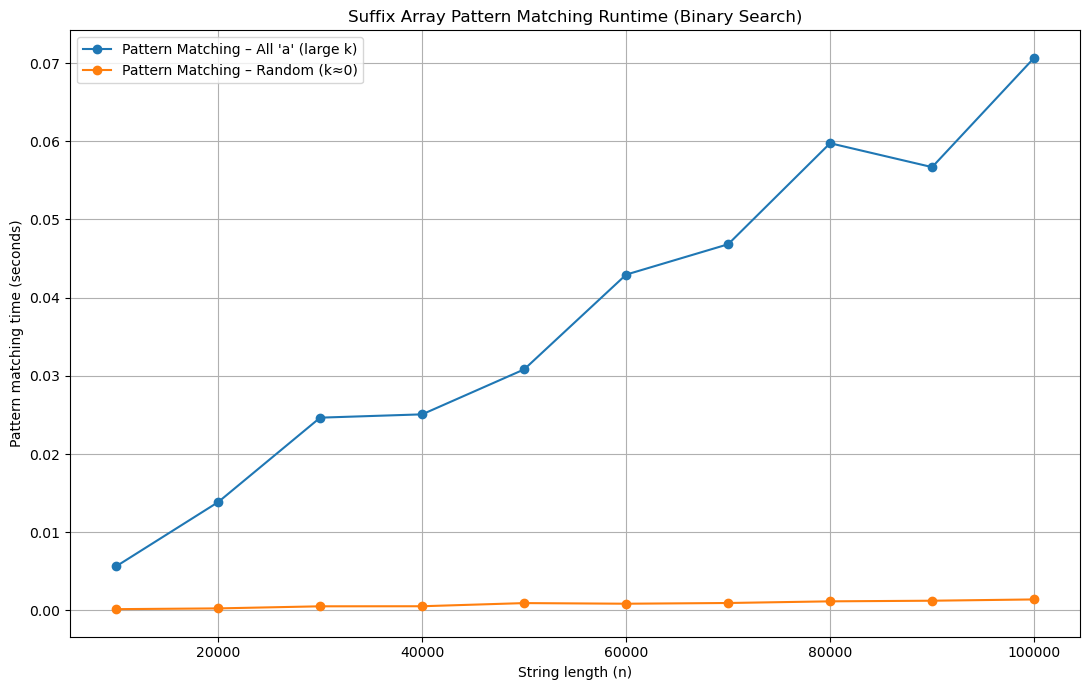

In [12]:
import os
import time
import matplotlib.pyplot as plt

# ---- FILE HELPERS ----

def read_string_from_file(path):
    with open(path, "r") as f:
        return f.read().strip()

def get_all_txt_files(folder):
    files = [
        os.path.join(folder, f)
        for f in os.listdir(folder)
        if f.endswith(".txt")
    ]
    files.sort(key=lambda x: int(''.join(filter(str.isdigit, os.path.basename(x)))))
    return files

def measure(func, *args):
    start = time.perf_counter()
    func(*args)
    return time.perf_counter() - start


# ---- EXPERIMENT SETUP ----

all_a_dir = "all_a_str"
random_dir = "random_str"
num_files = 10

all_a_files = get_all_txt_files(all_a_dir)[:num_files]
random_files = get_all_txt_files(random_dir)[:num_files]

print(f"Processing {len(all_a_files)} 'all-a' files and {len(random_files)} random files")

results_all_a = []
results_random = []

pattern = "aaa"


for file_path in all_a_files + random_files:
    try:
        text = read_string_from_file(file_path)
        n = len(text)

        # Build suffix array with prefix-doubling
        sa = suffix_array_prefix_doubling(text)

        # Measure binary-search pattern matching
        t = measure(binary_search, text, sa, pattern)

        if "all_a" in file_path:
            results_all_a.append((n, t))
        else:
            results_random.append((n, t))

        print(f"{os.path.basename(file_path):<25} | n={n:<7} | time={t:.5f}s")

    except Exception as e:
        print(f"Error: {e}")


# ---- SORT & UNPACK ----

results_all_a.sort()
results_random.sort()

lengths_all_a, times_all_a = zip(*results_all_a)
lengths_random, times_random = zip(*results_random)


# ---- PLOT ----

plt.figure(figsize=(11,7))

plt.plot(lengths_all_a, times_all_a, "-o", label="Pattern Matching – All 'a' (large k)")
plt.plot(lengths_random, times_random, "-o", label="Pattern Matching – Random (k≈0)")

plt.xlabel("String length (n)")
plt.ylabel("Pattern matching time (seconds)")
plt.title("Suffix Array Pattern Matching Runtime (Binary Search)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The experiments confirm the theoretical worst-case complexity of suffix-array pattern matching.

In all-‘a’ strings, the pattern appears at almost every position, so runtime grows nearly linearly with the text length. This matches the O(mk) cost of expanding all matching suffixes after binary search.

In random strings, the pattern rarely appears, and runtime remains almost constant as O(mlogn) binary-search cost, where log(n) grows slowly.

## 5. BWT-Based Exact Pattern Matching

Implement the **Burrows–Wheeler Transform (BWT)**–based pattern matching algorithm (from *Week 6*).

This involves:

- Constructing the **suffix array** (using your earlier implementation)
- Computing the **BWT** of the input string
- Building:
  - The **C-table** in **O(n)** time
  - The **O-table** in **O(σ × n)** time, where σ = alphabet size

Explain the steps and justify the time complexity of each construction phase.

## 6. Testing Correctness of BWT-Based Algorithm

Describe how you tested the correctness of your **BWT-based pattern matcher**.

- **Choice of test data:**
  - Include both simple and real-world texts (e.g., repetitive DNA sequences, English text).
  - Verify outputs against brute-force pattern matching or suffix-array–based results.


## 7. Experimental Comparison: BWT vs Suffix Array Matching

Design experiments comparing **BWT-based** and **suffix-array–based** methods.

- Examine their **running times** in practice.
- Include an experiment where:
  - Many short patterns (~100 characters)  
  - Are matched against a long text (~1,000,000 characters)
- Exclude preprocessing time (e.g., suffix array, C-table, and O-table construction)
- Discuss:
  - Efficiency differences between methods
  - How input characteristics (repetitive vs random text) affect performance

## Notes

- Focus on **practical runtime behavior**, not just theoretical complexity.
- Provide clear **plots**, **tables**, or **runtime statistics**.
- Include **code snippets** and **observations** to support your analysis.

